In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt

#### Data till Matchday 17

In [2]:
bundesliga_standard_stats = pd.read_csv('BundesligaPlayerstatsStats23-24.csv')

In [3]:
bundesliga_standard_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Player      446 non-null    object 
 1   Nation      446 non-null    object 
 2   Pos         446 non-null    object 
 3   Squad       446 non-null    object 
 4   Age         446 non-null    object 
 5   Born        446 non-null    int64  
 6   MP          446 non-null    int64  
 7   Starts      446 non-null    int64  
 8   Min         446 non-null    object 
 9   90s         446 non-null    float64
 10  Gls         446 non-null    int64  
 11  Ast         446 non-null    int64  
 12  G+A         446 non-null    int64  
 13  G-PK        446 non-null    int64  
 14  PK          446 non-null    int64  
 15  PKatt       446 non-null    int64  
 16  CrdY        446 non-null    int64  
 17  CrdR        446 non-null    int64  
 18  xG          446 non-null    float64
 19  npxG        446 non-null    f

In [4]:
bundesliga_standard_stats.head()

,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,90s,...,Gls.1,Ast.1,G+A.1,G-PK.1,G+A-PK,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1
0,Brenden Aaronson,us USA,MF,Union Berlin,23-089,2000,12,5,395,4.4,...,0.0,0.00,0.00,0.0,0.00,0.05,0.06,0.12,0.05,0.12
1,Paxten Aaronson,us USA,MF,Eint Frankfurt,20-146,2003,7,1,101,1.1,...,0.0,0.89,0.89,0.0,0.89,0.11,0.07,0.19,0.11,0.19
2,Junior Adamu,at AUT,"FW,MF",Freiburg,22-227,2001,12,0,95,1.1,...,0.0,0.00,0.00,0.0,0.00,0.06,0.11,0.17,0.06,0.17
3,Sargis Adamyan,am ARM,"FW,MF",Köln,30-241,1993,5,0,142,1.6,...,0.0,0.63,0.63,0.0,0.63,0.59,0.34,0.93,0.59,0.93
4,Karim Adeyemi,de GER,"FW,MF",Dortmund,22-001,2002,11,3,370,4.1,...,0.0,0.24,0.24,0.0,0.24,0.20,0.21,0.40,0.20,0.40


In [5]:
# Rename the columns
new_column_names = {'G-PK': 'npGls', 'Gls.1': 'Glsp90', 'Ast.1': 'Astp90', 'G+A.1': 'G+Ap90', 
                    'G-PK.1': 'npGlsp90', 'G+A-PK': 'npGlsAstp90', 'xG.1': 'xGp90', 'xAG.1': 'xAGp90', 'xG+xAG': 'xG+xAGp90',
                   'npxG.1': 'npxGp90', 'npxG+xAG.1': 'npxG+xAGp90'}

bundesliga_standard_stats = bundesliga_standard_stats.rename(columns=new_column_names)

In [6]:
bundesliga_standard_stats.columns.unique()

Index(['Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', 'MP', 'Starts',
       'Min', '90s', 'Gls', 'Ast', 'G+A', 'npGls', 'PK', 'PKatt', 'CrdY',
       'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR',
       'Glsp90', 'Astp90', 'G+Ap90', 'npGlsp90', 'npGlsAstp90', 'xGp90',
       'xAGp90', 'xG+xAGp90', 'npxGp90', 'npxG+xAGp90'],
      dtype='object')

#### Bundesliga standard stats csv updated, only run from below this cell next time onwards

In [93]:
# bundesliga_standard_stats.to_csv('BundesligaPlayerstatsStats23-24.csv', index=False)
bundesliga_standard_stats = pd.read_csv('BundesligaPlayerstatsStats23-24.csv')

In [94]:
# bundesliga_standard_stats.drop('Unnamed: 0', axis=1, inplace=True)
bundesliga_standard_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Player       446 non-null    object 
 1   Nation       446 non-null    object 
 2   Pos          446 non-null    object 
 3   Squad        446 non-null    object 
 4   Age          446 non-null    object 
 5   Born         446 non-null    int64  
 6   MP           446 non-null    int64  
 7   Starts       446 non-null    int64  
 8   Min          446 non-null    object 
 9   90s          446 non-null    float64
 10  Gls          446 non-null    int64  
 11  Ast          446 non-null    int64  
 12  G+A          446 non-null    int64  
 13  npGls        446 non-null    int64  
 14  PK           446 non-null    int64  
 15  PKatt        446 non-null    int64  
 16  CrdY         446 non-null    int64  
 17  CrdR         446 non-null    int64  
 18  xG           446 non-null    float64
 19  npxG    

In [95]:
# Converting mins from object type to numeric type

bundesliga_standard_stats['Min'] = bundesliga_standard_stats['Min'].replace({',':''}, regex=True)
bundesliga_standard_stats['Min'] = pd.to_numeric(bundesliga_standard_stats['Min'])

In [96]:
# We only consider forwards that have played over 810 minutes, i.e. 9 games. 17 games have been played so far. 

bundesliga_forwards = bundesliga_standard_stats[(bundesliga_standard_stats['Pos'] == 'FW') & (bundesliga_standard_stats['Min'] > 810)]

In [97]:
bundesliga_forwards

,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,90s,...,Glsp90,Astp90,G+Ap90,npGlsp90,npGlsAstp90,xGp90,xAGp90,xG+xAGp90,npxGp90,npxG+xAGp90
7,Ludovic Ajorque,fr FRA,FW,Mainz 05,29-328,1994,13,10,878,9.8,...,0.10,0.00,0.10,0.10,0.10,0.46,0.07,0.53,0.30,0.37
33,Kevin Behrens,de GER,FW,Union Berlin,32-350,1991,16,13,1108,12.3,...,0.32,0.00,0.32,0.32,0.32,0.41,0.07,0.47,0.41,0.47
34,Maximilian Beier,de GER,FW,Hoffenheim,21-094,2002,16,12,1028,11.4,...,0.53,0.00,0.53,0.53,0.53,0.46,0.02,0.48,0.46,0.48
45,Victor Boniface,ng NGA,FW,Leverkusen,23-027,2000,16,15,1276,14.2,...,0.71,0.49,1.20,0.63,1.13,0.85,0.25,1.10,0.79,1.05
49,Rafael Borré,co COL,FW,Werder Bremen,28-126,1995,14,11,904,10.0,...,0.40,0.00,0.40,0.40,0.40,0.21,0.18,0.39,0.21,0.39
72,Kingsley Coman,fr FRA,FW,Bayern Munich,27-220,1996,12,11,853,9.5,...,0.32,0.32,0.63,0.32,0.63,0.26,0.38,0.64,0.26,0.64
94,Marvin Ducksch,de GER,FW,Werder Bremen,29-318,1994,17,16,1358,15.1,...,0.46,0.27,0.73,0.33,0.60,0.37,0.25,0.62,0.20,0.46
113,Niclas Füllkrug,de GER,FW,Dortmund,30-344,1993,15,13,1090,12.1,...,0.41,0.41,0.83,0.41,0.83,0.42,0.19,0.61,0.42,0.61
136,Serhou Guirassy,gn GUI,FW,Stuttgart,27-313,1996,14,12,1055,11.7,...,1.45,0.09,1.54,1.19,1.28,0.99,0.30,1.29,0.79,1.09
185,Harry Kane,eng ENG,FW,Bayern Munich,30-175,1993,16,16,1408,15.6,...,1.41,0.32,1.73,1.21,1.53,1.02,0.32,1.34,0.87,1.19


We have 19 players to consider. These forwards have been the most reliable for their teams so far having played atleast half the games of all the games played this season.

In [98]:
bundesliga_forwards.sort_values(by='npxGp90', ascending=False)
# bundesliga_forwards = bundesliga_forwards[bundesliga_forwards['npxGp90'] > 0.2]

,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,90s,...,Glsp90,Astp90,G+Ap90,npGlsp90,npGlsAstp90,xGp90,xAGp90,xG+xAGp90,npxGp90,npxG+xAGp90
185,Harry Kane,eng ENG,FW,Bayern Munich,30-175,1993,16,16,1408,15.6,...,1.41,0.32,1.73,1.21,1.53,1.02,0.32,1.34,0.87,1.19
45,Victor Boniface,ng NGA,FW,Leverkusen,23-027,2000,16,15,1276,14.2,...,0.71,0.49,1.20,0.63,1.13,0.85,0.25,1.10,0.79,1.05
136,Serhou Guirassy,gn GUI,FW,Stuttgart,27-313,1996,14,12,1055,11.7,...,1.45,0.09,1.54,1.19,1.28,0.99,0.30,1.29,0.79,1.09
412,Deniz Undav,de GER,FW,Stuttgart,27-184,1996,14,9,870,9.7,...,0.93,0.31,1.24,0.93,1.24,0.86,0.25,1.12,0.78,1.04
291,Loïs Openda,be BEL,FW,RB Leipzig,23-337,2000,17,17,1345,14.9,...,0.74,0.27,1.00,0.60,0.87,0.80,0.22,1.02,0.69,0.91
347,Leroy Sané,de GER,FW,Bayern Munich,28-008,1996,16,16,1386,15.4,...,0.52,0.65,1.17,0.52,1.17,0.57,0.59,1.16,0.57,1.16
34,Maximilian Beier,de GER,FW,Hoffenheim,21-094,2002,16,12,1028,11.4,...,0.53,0.00,0.53,0.53,0.53,0.46,0.02,0.48,0.46,0.48
113,Niclas Füllkrug,de GER,FW,Dortmund,30-344,1993,15,13,1090,12.1,...,0.41,0.41,0.83,0.41,0.83,0.42,0.19,0.61,0.42,0.61
199,Tim Kleindienst,de GER,FW,Heidenheim,28-141,1995,17,17,1486,16.5,...,0.36,0.18,0.55,0.24,0.42,0.52,0.12,0.64,0.42,0.54
400,Phillip Tietz,de GER,FW,Augsburg,26-194,1997,17,14,1134,12.6,...,0.24,0.16,0.40,0.24,0.40,0.41,0.09,0.50,0.41,0.50


### Ranking all the forwards from Bundesliga based on their Non-Penalty Expected Goals per 90 minutes

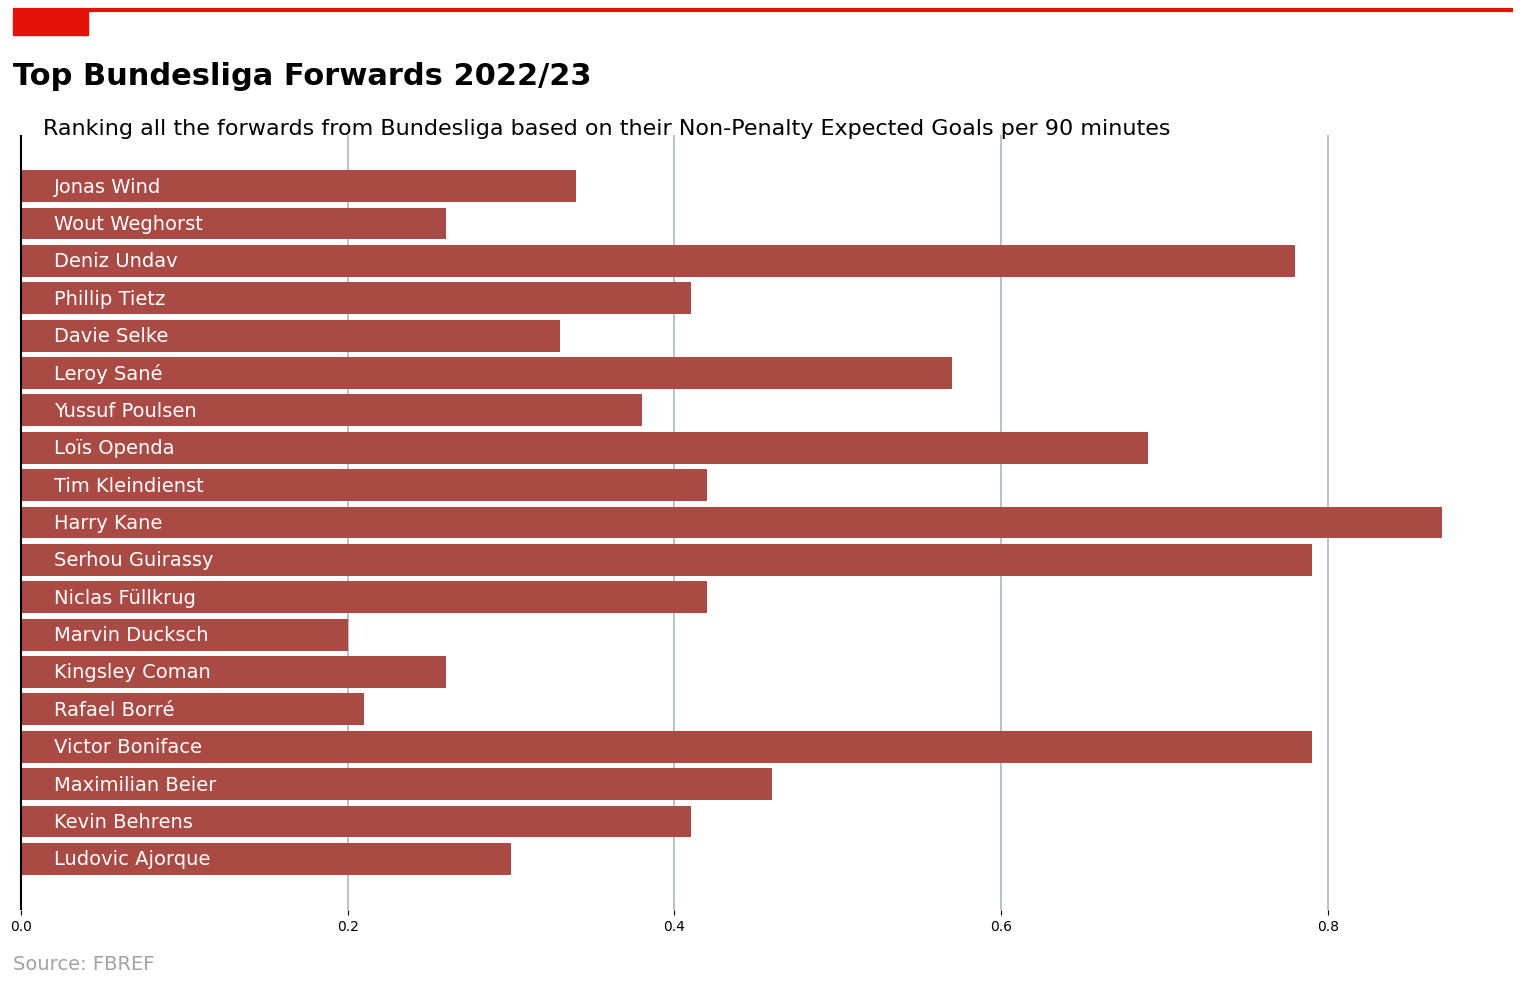

In [99]:
import matplotlib.pyplot as plt
from matplotlib import lines
from matplotlib import patches
from matplotlib.patheffects import withStroke

# The colors
BLUE = "#076fa2"
RED = "#E3120B"
BLACK = "#202020"
GREY = "#a2a2a2"

fig, ax = plt.subplots(figsize=(15, 10))

y = bundesliga_forwards['Player'].values
x = bundesliga_forwards['npxGp90']

bars = ax.barh(y, x, height=0.85, align="edge", color='#AA4A44');

ax.set_axisbelow(True)
ax.grid(axis = "x", color="#A8BAC4", lw=1.2)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_lw(1.5)
ax.spines["left"].set_capstyle("butt")

# Generate numeric positions for y-axis labels using range
y_pos = range(len(y))

for name, count, y_p, bar in zip(y, x, y_pos, bars):
    label_x = "0"
    label_color = "white"
    path_effects = None
        
    ax.text(
        float(label_x) + 0.02,
        float(y_p) + 0.4,
        name,
        color=label_color,
        fontsize=14,
        va="center",
        path_effects=path_effects,
    )
# Hide y labels
ax.yaxis.set_visible(False)

# Make room on top and bottom
fig.subplots_adjust(left=0.005, right=1, top=0.875, bottom=0.1)

# Add title
fig.text(
    0, 0.925, "Top Bundesliga Forwards 2022/23", 
    fontsize=22, fontweight="bold"
)

# Add subtitle
fig.text(
    0.02, 0.875, "Ranking all the forwards from Bundesliga based on their Non-Penalty Expected Goals per 90 minutes", 
    fontsize=16
)

# Add caption
source = "Source: FBREF"
fig.text(
    0, 0.04, source, color=GREY, 
    fontsize=14
)

# Add line and rectangle on top.
fig.add_artist(lines.Line2D([0, 1], [1, 1], lw=3, color=RED, solid_capstyle="butt"))
fig.add_artist(patches.Rectangle((0, 0.975), 0.05, 0.025, color=RED))

# Save the plot with higher DPI
# plt.savefig('Bundesliga_forwards.png', dpi=600)

plt.show()

We can see that Harry Kane, Srehou Guirassy, Victor Boniface, Deniz Undav and Lois Openda are some of the best bundesliga fowards in terms of xG per 90.

### Non Penalty Goals per 90 vs Non Penalty Expected Goals per 90

In [100]:
show_names = list(bundesliga_forwards['Player'])
show_names

['Ludovic Ajorque',
 'Kevin Behrens',
 'Maximilian Beier',
 'Victor Boniface',
 'Rafael Borré',
 'Kingsley Coman',
 'Marvin Ducksch',
 'Niclas Füllkrug',
 'Serhou Guirassy',
 'Harry Kane',
 'Tim Kleindienst',
 'Loïs Openda',
 'Yussuf Poulsen',
 'Leroy Sané',
 'Davie Selke',
 'Phillip Tietz',
 'Deniz Undav',
 'Wout Weghorst',
 'Jonas Wind']

In [101]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from adjustText import adjust_text
from matplotlib.patches import Ellipse
el = Ellipse((2, -1), 0.5, 0.5)

# Set the figure size
plt.figure(figsize=(20, 20), dpi=600)

# Calculate median values for x and y variables
x_median = bundesliga_forwards['npxGp90'].median()
y_median = bundesliga_forwards['npGlsp90'].median()

# Plot 'Glsp90' against 'xGp90'
plt.scatter(bundesliga_forwards['npxGp90'], bundesliga_forwards['npGlsp90'], marker='None')
plt.xlabel('Non Penalty Expected Goals per 90')
plt.ylabel('Non Penalty Goals per 90')
plt.title('Non Penalty Goals per 90 vs Non Penalty Expected Goals per 90')


# Annotate some data points with player names
texts = []
for i, player in bundesliga_forwards.iterrows():
    if player['Player'] in show_names:
        text = plt.text(player['npxGp90']+0.01, player['npGlsp90']+0.03, player['Player'])
        texts.append(text)

adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k', lw=0.5))
    
# Add club logos for selected data points
for i, player in bundesliga_forwards.iterrows():
#     if player['Player'] in show_badges:
    img_path = '../club-logos/bundesliga/' + player['Squad'] + '.png'
    image = plt.imread(img_path)
    imagebox = OffsetImage(image, zoom = 0.075, alpha = 1)
    ab = AnnotationBbox(imagebox, (player['npxGp90'], player['npGlsp90']), frameon=False)
    plt.gca().add_artist(ab)

# Add median lines
plt.axline((0, 0), (1, 1), color='#808080', linestyle='--',)  # Draw line through origin
plt.axhline(y=y_median, color='#808080', linestyle='--', label='Median npGlsp90')
plt.axvline(x=x_median, color='#808080', linestyle='--', label='Median xGp90')

# Quadrants explanation
plt.text(0.25, 1.18, "Scoring more\nthan expected\n(Overperforming)", size=12,
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec='#F4A68B',
                   fc='#F4A68B',
                   )
         )
plt.text(0.8, 0.15, "Scoring less\nthan expected\n(Underperforming)", size=12,
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec='#F4A68B',
                   fc='#F4A68B',
                   )
         )

# plt.legend()
plt.grid()

plt.show()

#### These are the forwards leading the race to be included in our Best XI mid-season.

Kane, Guirassy and Undav can be seen overperforming their xG while Openda and Boniface underperforming. It is not expected that they regress to the mean over the course of the season. This is just an indication of their performance so far this season.

In [74]:
bundesliga_fowards_shooting = pd.read_csv('BundesligaPlayershootingStats23-24.csv')
bundesliga_fowards_shooting.head()

,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,SoT,...,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG
0,Brenden Aaronson,us USA,MF,Union Berlin,23-089,2000,4.4,0,3,1,...,0.0,17.8,0,0,0,0.2,0.2,0.08,-0.2,-0.2
1,Paxten Aaronson,us USA,MF,Eint Frankfurt,20-146,2003,1.1,0,2,2,...,0.0,15.1,0,0,0,0.1,0.1,0.06,-0.1,-0.1
2,Junior Adamu,at AUT,"FW,MF",Freiburg,22-227,2001,1.1,0,2,1,...,0.0,12.1,0,0,0,0.1,0.1,0.03,-0.1,-0.1
3,Sargis Adamyan,am ARM,"FW,MF",Köln,30-241,1993,1.6,0,5,4,...,0.0,10.8,0,0,0,0.9,0.9,0.19,-0.9,-0.9
4,Karim Adeyemi,de GER,"FW,MF",Dortmund,22-001,2002,4.1,0,5,2,...,0.0,14.4,0,0,0,0.8,0.8,0.16,-0.8,-0.8


In [79]:
# bundesliga_fowards_shooting['Min'] = bundesliga_fowards_shooting['90s'] * 90
bundesliga_fowards_shooting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 25 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Player   446 non-null    object 
 1   Nation   446 non-null    object 
 2   Pos      446 non-null    object 
 3   Squad    446 non-null    object 
 4   Age      446 non-null    object 
 5   Born     446 non-null    int64  
 6   90s      446 non-null    float64
 7   Gls      446 non-null    int64  
 8   Sh       446 non-null    int64  
 9   SoT      446 non-null    int64  
 10  SoT%     364 non-null    float64
 11  Sh/90    446 non-null    float64
 12  SoT/90   446 non-null    float64
 13  G/Sh     364 non-null    float64
 14  G/SoT    297 non-null    float64
 15  Dist     364 non-null    float64
 16  FK       446 non-null    int64  
 17  PK       446 non-null    int64  
 18  PKatt    446 non-null    int64  
 19  xG       446 non-null    float64
 20  npxG     446 non-null    float64
 21  npxG/Sh  364 non

In [81]:
# Rename the columns
new_column_names = {'G-PK': 'npGls', 'Gls.1': 'Glsp90', 'Ast.1': 'Astp90', 'G+A.1': 'G+Ap90', 
                    'G-PK.1': 'npGlsp90', 'G+A-PK': 'npGlsAstp90', 'xG.1': 'xGp90', 'xAG.1': 'xAGp90', 'xG+xAG': 'xG+xAGp90',
                   'npxG.1': 'npxGp90', 'npxG+xAG.1': 'npxG+xAGp90'}

bundesliga_fowards_shooting = bundesliga_fowards_shooting.rename(columns=new_column_names)

# We only consider forwards that have played over 810 minutes, i.e. 9 games. 17 games have been played so far. 

bundesliga_fowards_shooting = bundesliga_fowards_shooting[(bundesliga_fowards_shooting['Pos'] == 'FW') & (bundesliga_fowards_shooting['Min'] > 810)]

In [105]:
bundesliga_fowards_shooting.columns.unique()

Index(['Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', '90s', 'Gls', 'Sh',
       'SoT', 'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'Dist', 'FK', 'PK',
       'PKatt', 'xG', 'npxG', 'npxG/Sh', 'G-xG', 'np:G-xG', 'Min'],
      dtype='object')

In [118]:
merged_bundesliga_forwards = pd.merge(bundesliga_forwards, bundesliga_fowards_shooting, on='Player', how='inner')
merged_bundesliga_forwards.head()

,Player,Nation_x,Pos_x,Squad_x,Age_x,Born_x,MP,Starts,Min_x,90s_x,...,Dist,FK,PK_y,PKatt_y,xG_y,npxG_y,npxG/Sh,G-xG,np:G-xG,Min_y
0,Ludovic Ajorque,fr FRA,FW,Mainz 05,29-328,1994,13,10,878,9.8,...,12.6,0,0,2,4.5,2.9,0.15,-3.5,-1.9,882.0
1,Kevin Behrens,de GER,FW,Union Berlin,32-350,1991,16,13,1108,12.3,...,11.1,0,0,0,5.0,5.0,0.14,-1.0,-1.0,1107.0
2,Maximilian Beier,de GER,FW,Hoffenheim,21-094,2002,16,12,1028,11.4,...,14.8,0,0,0,5.3,5.3,0.14,0.7,0.7,1026.0
3,Victor Boniface,ng NGA,FW,Leverkusen,23-027,2000,16,15,1276,14.2,...,15.7,0,1,1,12.1,11.3,0.16,-2.1,-2.3,1278.0
4,Rafael Borré,co COL,FW,Werder Bremen,28-126,1995,14,11,904,10.0,...,14.8,0,0,0,2.1,2.1,0.13,1.9,1.9,900.0


In [119]:
merged_bundesliga_forwards.columns

Index(['Player', 'Nation_x', 'Pos_x', 'Squad_x', 'Age_x', 'Born_x', 'MP',
       'Starts', 'Min_x', '90s_x', 'Gls_x', 'Ast', 'G+A', 'npGls', 'PK_x',
       'PKatt_x', 'CrdY', 'CrdR', 'xG_x', 'npxG_x', 'xAG', 'npxG+xAG', 'PrgC',
       'PrgP', 'PrgR', 'Glsp90', 'Astp90', 'G+Ap90', 'npGlsp90', 'npGlsAstp90',
       'xGp90', 'xAGp90', 'xG+xAGp90', 'npxGp90', 'npxG+xAGp90', 'Nation_y',
       'Pos_y', 'Squad_y', 'Age_y', 'Born_y', '90s_y', 'Gls_y', 'Sh', 'SoT',
       'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'Dist', 'FK', 'PK_y',
       'PKatt_y', 'xG_y', 'npxG_y', 'npxG/Sh', 'G-xG', 'np:G-xG', 'Min_y'],
      dtype='object')

In [120]:
drop_columns = list(merged_bundesliga_forwards.columns)

columns_to_keep = ['Player', 'PrgC', 'PrgP', 'PrgR', 'npxGp90', 'npxG+xAGp90', 'Sh', 
                   'SoT%', 'SoT/90', 'G/SoT', 'Dist', 'npxG/Sh', 'np:G-xG']

drop_columns = [col for col in drop_columns if col not in columns_to_keep]

In [121]:
merged_bundesliga_forwards.drop(columns=drop_columns, inplace=True)

In [126]:
merged_bundesliga_forwards = merged_bundesliga_forwards.sort_values(by='npxG+xAGp90', ascending=False)[:6]

In [130]:
merged_bundesliga_forwards = merged_bundesliga_forwards[merged_bundesliga_forwards['Player'] != 'Leroy Sané']

In [131]:
merged_bundesliga_forwards

,Player,PrgC,PrgP,PrgR,npxGp90,npxG+xAGp90,Sh,SoT%,SoT/90,G/SoT,Dist,npxG/Sh,np:G-xG
9,Harry Kane,18,45,75,0.87,1.19,68,50.0,2.17,0.56,15.2,0.20,5.5
8,Serhou Guirassy,16,22,82,0.79,1.09,45,48.9,1.88,0.64,15.1,0.20,4.8
3,Victor Boniface,43,29,131,0.79,1.05,70,40.0,1.97,0.32,15.7,0.16,-2.3
16,Deniz Undav,21,38,78,0.78,1.04,45,51.1,2.38,0.39,16.7,0.17,1.4
11,Loïs Openda,42,22,123,0.69,0.91,72,44.4,2.14,0.28,14.7,0.15,-1.4


In [132]:
params = columns_to_keep[1:]
params

['PrgC',
 'PrgP',
 'PrgR',
 'npxGp90',
 'npxG+xAGp90',
 'Sh',
 'SoT%',
 'SoT/90',
 'G/SoT',
 'Dist',
 'npxG/Sh',
 'np:G-xG']

In [133]:
ranges = []

for x in params:
  a = min(merged_bundesliga_forwards[params][x])
  a = a - (a*.25)

  b = max(merged_bundesliga_forwards[params][x])
  b = b + (b*.25)

  ranges.append((a,b))

In [167]:
low, high = [], []
for r in ranges:
    low.append(r[0])
    high.append(r[1])

In [168]:
low, high

([12.0,
  16.5,
  56.25,
  0.5175,
  0.6825,
  33.75,
  30.0,
  1.41,
  0.21000000000000002,
  11.024999999999999,
  0.11249999999999999,
  -1.7249999999999999],
 [53.75,
  56.25,
  163.75,
  1.0875,
  1.4874999999999998,
  90.0,
  63.875,
  2.9749999999999996,
  0.8,
  20.875,
  0.25,
  6.875])

In [140]:
hk_values, sg_values, vb_values, du_values, lo_values = [], [], [], [], []

for player in ['Harry Kane', 'Serhou Guirassy', 'Victor Boniface', 'Deniz Undav', 'Loïs Openda']:
    player_row = merged_bundesliga_forwards.loc[merged_bundesliga_forwards['Player'] == player]
    
    if not player_row.empty:
        values = player_row.iloc[0].values.tolist()[1:]
        
        if player == 'Harry Kane':
            hk_values = values
        elif player == 'Serhou Guirassy':
            sg_values = values
        elif player == 'Victor Boniface':
            vb_values = values
        elif player == 'Deniz Undav':
            du_values = values
        elif player == 'Loïs Openda':
            lo_values = values

all_values = [hk_values, sg_values, vb_values, du_values, lo_values]

In [141]:
all_values

[[18, 45, 75, 0.87, 1.19, 68, 50.0, 2.17, 0.56, 15.2, 0.2, 5.5],
 [16, 22, 82, 0.79, 1.09, 45, 48.9, 1.88, 0.64, 15.1, 0.2, 4.8],
 [43, 29, 131, 0.79, 1.05, 70, 40.0, 1.97, 0.32, 15.7, 0.16, -2.3],
 [21, 38, 78, 0.78, 1.04, 45, 51.1, 2.38, 0.39, 16.7, 0.17, 1.4],
 [42, 22, 123, 0.69, 0.91, 72, 44.4, 2.14, 0.28, 14.7, 0.15, -1.4]]

In [159]:
from mplsoccer import Radar, FontManager, grid

In [170]:
radar = Radar(params, low, high,
              # whether to round any of the labels to integers instead of decimal places
              round_int=[False]*len(params),
              num_rings=4,  # the number of concentric circles (excluding center circle)
              # if the ring_width is more than the center_circle_radius then
              # the center circle radius will be wider than the width of the concentric circles
              ring_width=1, center_circle_radius=1)

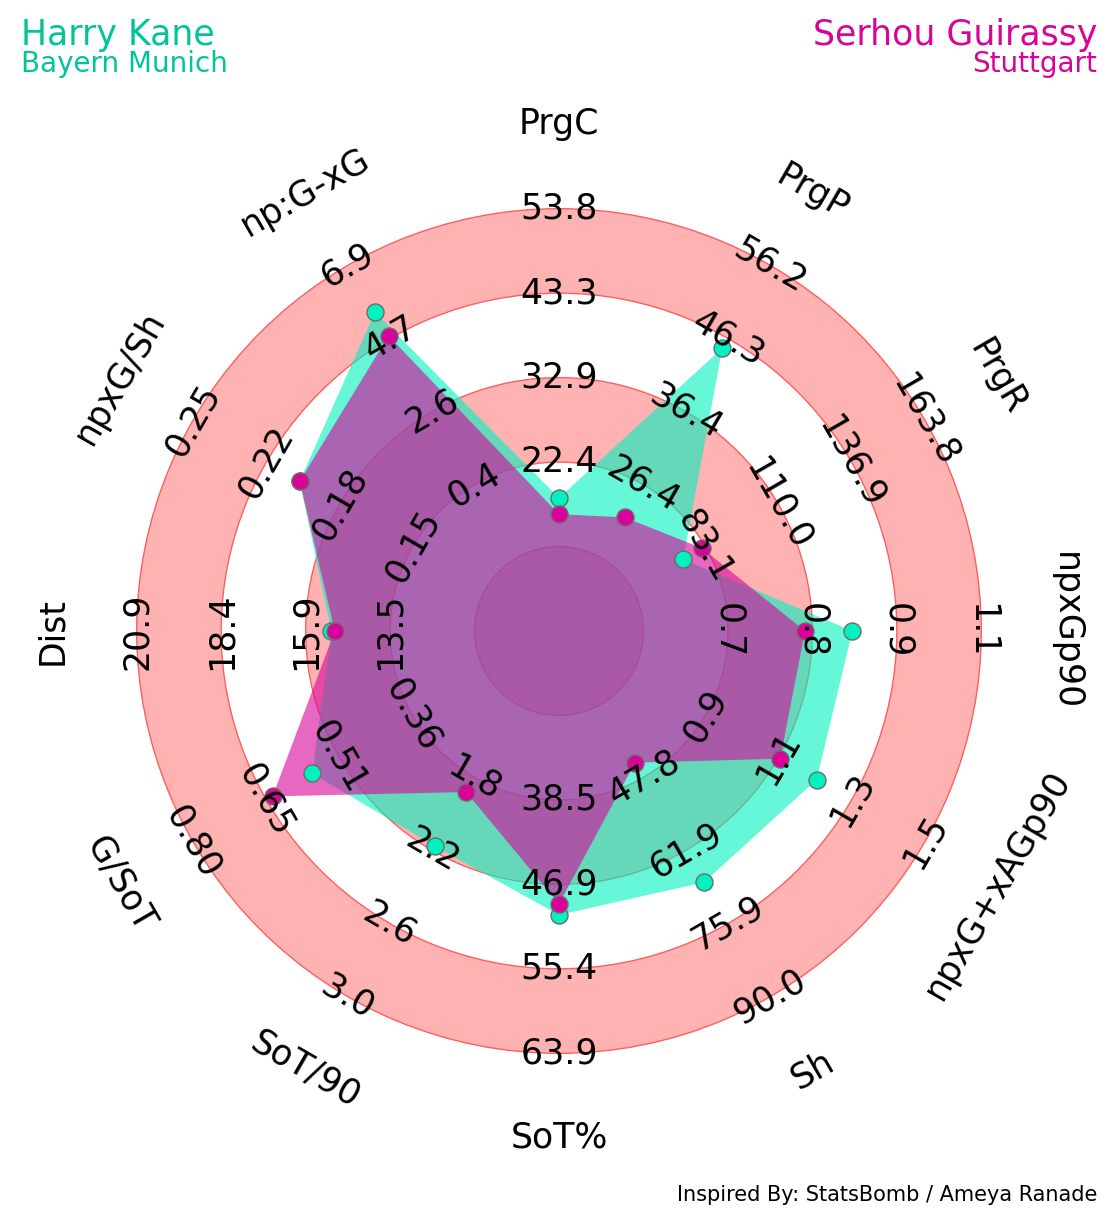

In [205]:
# creating the figure using the grid function from mplsoccer:
fig, axs = grid(figheight=12, grid_height=0.915, title_height=0.06, endnote_height=0.025,
                title_space=0, endnote_space=0, grid_key='radar', axis=False)

# plot radar
radar.setup_axis(ax=axs['radar'])  # format axis as a radar
rings_inner = radar.draw_circles(ax=axs['radar'], facecolor='#ffb2b2', edgecolor='#fc5f5f')
radar_output = radar.draw_radar_compare(hk_values, sg_values, ax=axs['radar'],
                                        kwargs_radar={'facecolor': '#00f2c1', 'alpha': 0.6},
                                        kwargs_compare={'facecolor': '#d80499', 'alpha': 0.6})
radar_poly, radar_poly2, vertices1, vertices2 = radar_output
range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=25)
param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=25)
axs['radar'].scatter(vertices1[:, 0], vertices1[:, 1],
                     c='#00f2c1', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)
axs['radar'].scatter(vertices2[:, 0], vertices2[:, 1],
                     c='#d80499', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)

# adding the endnote and title text (these axes range from 0-1, i.e. 0, 0 is the bottom left)
# Note we are slightly offsetting the text from the edges by 0.01 (1%, e.g. 0.99)
endnote_text = axs['endnote'].text(0.99, 0.5, 'Inspired By: StatsBomb / Ameya Ranade', fontsize=15,ha='right', va='center')

title1_text = axs['title'].text(0.01, 0.65, 'Harry Kane', fontsize=25, color='#01c49d',
                                ha='left', va='center')
title2_text = axs['title'].text(0.01, 0.25, 'Bayern Munich', fontsize=20,
                                ha='left', va='center', color='#01c49d')
title3_text = axs['title'].text(0.99, 0.65, 'Serhou Guirassy', fontsize=25,
                                ha='right', va='center', color='#d80499')
title4_text = axs['title'].text(0.99, 0.25, 'Stuttgart', fontsize=20,
                                ha='right', va='center', color='#d80499')

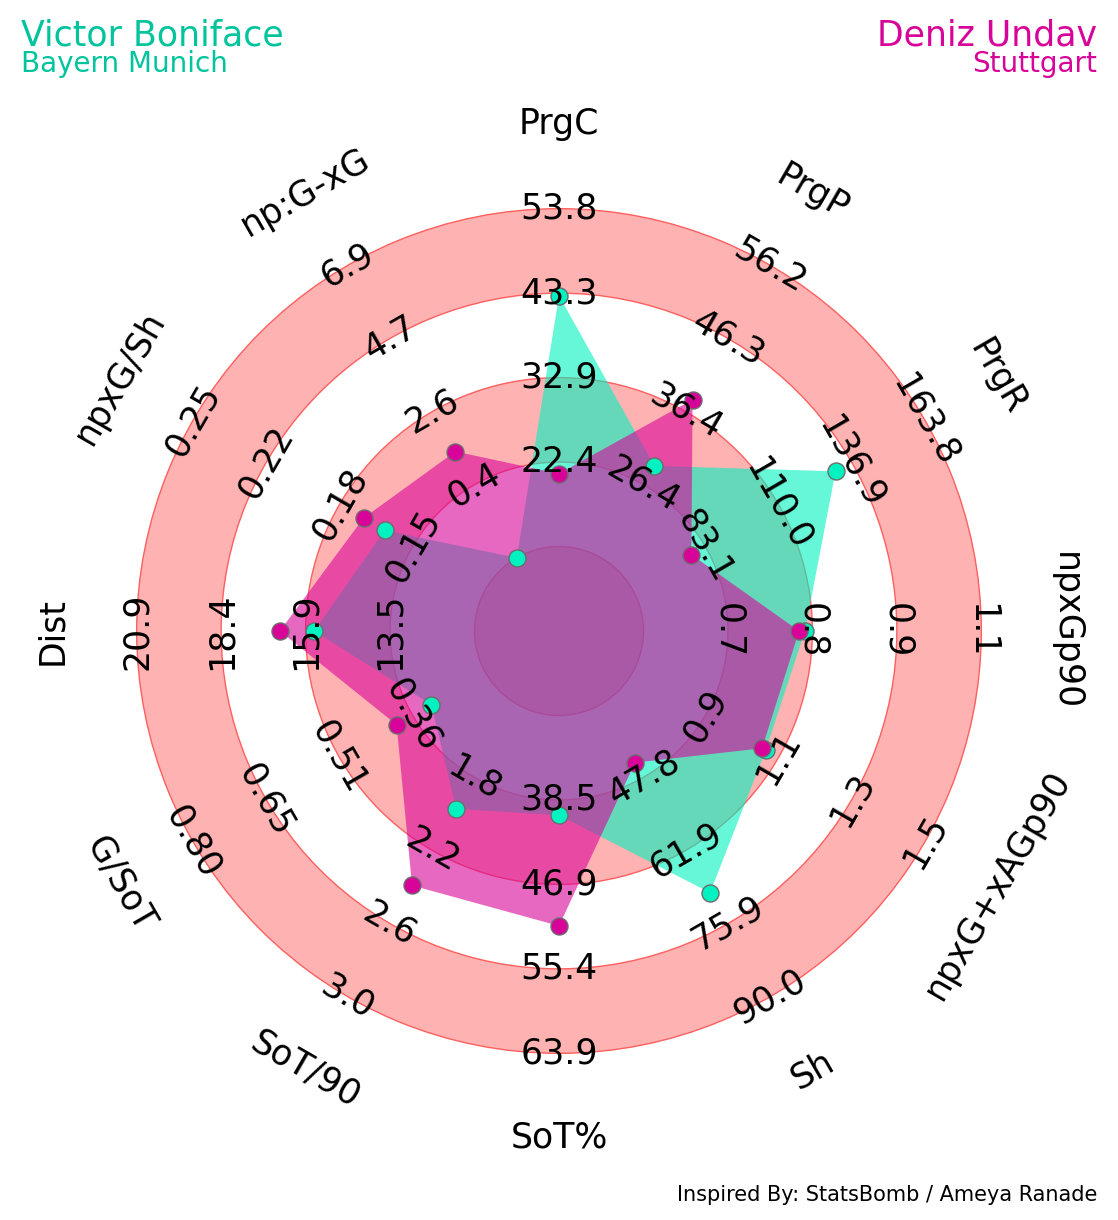

In [206]:
# creating the figure using the grid function from mplsoccer:
fig, axs = grid(figheight=12, grid_height=0.915, title_height=0.06, endnote_height=0.025,
                title_space=0, endnote_space=0, grid_key='radar', axis=False)

# plot radar
radar.setup_axis(ax=axs['radar'])  # format axis as a radar
rings_inner = radar.draw_circles(ax=axs['radar'], facecolor='#ffb2b2', edgecolor='#fc5f5f')
radar_output = radar.draw_radar_compare(vb_values, du_values, ax=axs['radar'],
                                        kwargs_radar={'facecolor': '#00f2c1', 'alpha': 0.6},
                                        kwargs_compare={'facecolor': '#d80499', 'alpha': 0.6})
radar_poly, radar_poly2, vertices1, vertices2 = radar_output
range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=25)
param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=25)
axs['radar'].scatter(vertices1[:, 0], vertices1[:, 1],
                     c='#00f2c1', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)
axs['radar'].scatter(vertices2[:, 0], vertices2[:, 1],
                     c='#d80499', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)

# adding the endnote and title text (these axes range from 0-1, i.e. 0, 0 is the bottom left)
# Note we are slightly offsetting the text from the edges by 0.01 (1%, e.g. 0.99)
endnote_text = axs['endnote'].text(0.99, 0.5, 'Inspired By: StatsBomb / Ameya Ranade', fontsize=15,ha='right', va='center')

title1_text = axs['title'].text(0.01, 0.65, 'Victor Boniface', fontsize=25, color='#01c49d',
                                ha='left', va='center')
title2_text = axs['title'].text(0.01, 0.25, 'Bayern Munich', fontsize=20,
                                ha='left', va='center', color='#01c49d')
title3_text = axs['title'].text(0.99, 0.65, 'Deniz Undav', fontsize=25,
                                ha='right', va='center', color='#d80499')
title4_text = axs['title'].text(0.99, 0.25, 'Stuttgart', fontsize=20,
                                ha='right', va='center', color='#d80499')

In [181]:
bundesliga_forwards['Squad'].unique()

array(['Mainz 05', 'Union Berlin', 'Hoffenheim', 'Leverkusen',
       'Werder Bremen', 'Bayern Munich', 'Dortmund', 'Stuttgart',
       'Heidenheim', 'RB Leipzig', 'Köln', 'Augsburg', 'Wolfsburg'],
      dtype=object)

xG
xG Assisted
Shots
Touches in Box
Passing%
Successful Dribbles
Turnovers
xG/Shot
Aerial Wins